In [21]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import time
import pandas as pd

In [6]:
def val(P,x):
    return P[0]+P[1]*x+P[2]*x*x
def grad(P,x):
    return P[1]+P[2]*2*x

In [113]:
st=time.time()
N,A=50,0
breadth=10
ITER=800
T=0.01
fout=None
fout=open('ret/simple_mean(N,A,breadth,ITER,T={},{},{},{},{}).txt'.format(N,A,breadth,ITER,T),'w')
fout.write('seed,opt,mean,median\n')
for seed in range(1,101):
    rnd.seed(seed)

    graph=[[j for j in range(max(0,i-breadth),min(i+breadth+1,N))] for i in range(N)]
    for a in range(A):
        graph.append([i for i in range(N)])
        for i in range(N):
            graph[i].append(len(graph)-1)
    Ps=[]
    for i in range(N):
        a=rnd.uniform(0,1)
        v=rnd.uniform(-100,100)
        #a(x-v)^2=ax^2-2avx+av^2
        Ps.append([a*v*v+rnd.uniform(-1000,1000),-2*a*v,a])

    locsversions=[]
    locs=[rnd.uniform(-400,400) for i in range(N)]
    for a in range(A):
        locs.append(10000)
    for rep in range(ITER):
        locsversions.append(locs.copy())
        nlocs=[locs[i]-T*grad(Ps[i],locs[i]) for i in range(N)]
        receivedVals=[[] for i in range(N+A)]
        for i in range(N+A):
            for j in graph[i]:
                receivedVals[j].append(nlocs[i] if i<N else 1000000)
                #basic adversary: always send the same big number to all neighbors
        for i in range(N):
            #TODO: use smarter use of neighbors' values?
            receivedVals[i].sort()
            locs[i]=np.mean(receivedVals[i])#[1:-1])
    locsversions.append(locs)

    tP=[0 for i in range(3)]
    for P in Ps:
        for i in range(3):
            tP[i]+=P[i]
    for i in range(3):
        tP[i]/=N
    opt_x=-tP[1]/(2*tP[2])
    scrs=[val(tP,locsversions[ITER][i]) for i in range(N)]
    line='{},{},{},{}'.format(seed,val(tP,opt_x),np.mean(scrs),np.median(scrs))
    print(line)
    fout.write(line+'\n')
    print('time='+str(time.time()-st))
fout.close()

1,1662.8954346209405,1663.6403423534898,1663.6001900126712
time=1.1463737487792969
2,2042.474950471248,2045.4876298577285,2045.566287125938
time=2.4436333179473877
3,1478.4005600825353,1479.1826522371425,1478.944838917806
time=3.6076409816741943
4,1514.0228227724397,1514.9592873582897,1514.989433633381
time=5.067978858947754
5,2004.9142775692517,2006.3401572932667,2006.3517143710662
time=7.2128005027771
6,1878.7940106579588,1879.0705288514866,1879.0667655535876
time=8.5353524684906
7,1361.824926502943,1361.9340839638496,1361.8992877942653
time=9.605166912078857
8,1306.686798255798,1306.9746914786429,1306.9487060285173
time=10.680232763290405
9,2090.260944820599,2091.71136735157,2091.8856730685206
time=11.722116708755493
10,1635.6923804040312,1638.1674366892685,1637.7754086099571
time=12.809453010559082
11,1592.7901154069762,1593.2305401585284,1593.1853783402353
time=13.874428033828735
12,1238.525196998235,1241.4731832100547,1241.4425746269794
time=14.931227922439575
13,1424.11687823291

<IPython.core.display.Javascript object>


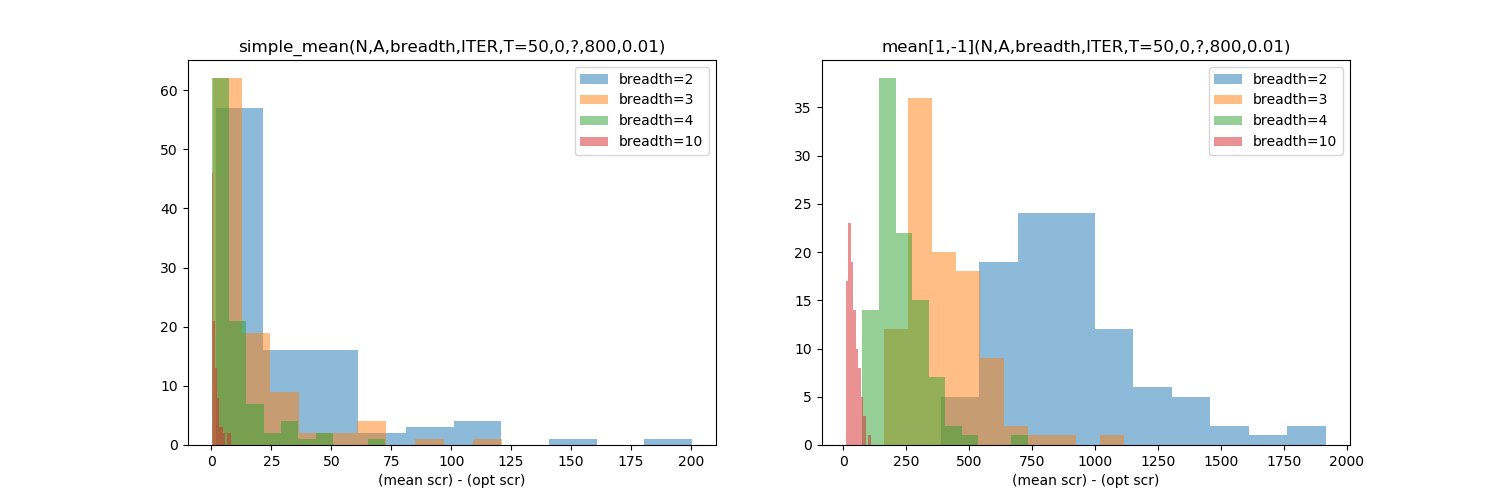

In [115]:
tmp={}
DFs={}
FORMS=['ret/simple_mean(N,A,breadth,ITER,T={},{},{},{},{}).txt','ret/mean[1,-1](N,A,breadth,ITER,T={},{},{},{},{}).txt']
paramsets=[[[50,0,b,800,0.01] for b in [2,3,4,10]], [[50,1,b,800,0.01] for b in [2,3,4,10]]]
fig,axs=plt.subplots(1,2,figsize=(15,5))
FORM=None
params=None
for axi in range(len(axs)):
    FORM=FORMS[axi]
    params=paramsets[axi]
    ax=axs[axi]
    ax.set_title(FORM[len('ret/'):-len('.txt')].format(N,A,'?',ITER,T))
    ax.set_xlabel('(mean scr) - (opt scr)')
    for p in paramsets[axi]:
        F=FORM.format(*p)
        fin=open(F,'r')
        txt=[l for l in fin]
        #print(txt)
        names=txt[0][0:-1].split(',')
        infos={}
        for n in names:
            infos[n]=[]
        for i in range(1,len(txt)):
            info=list(map(lambda x:float(x),txt[i][0:-1].split(',')))
            info[0]=int(info[0])
            for j in range(len(info)):
                infos[names[j]].append(info[j])
        DFs[F]=pd.DataFrame(infos)
        #print(DFs[F])
        #print(np.array(DFs[F]['mean']-DFs[F]['opt']))
        ax.hist(np.array(DFs[F]['mean']-DFs[F]['opt']),alpha=0.5,label='breadth='+str(p[2]))
    ax.legend()